In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra  # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.datasets import imdb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0][:10], train_labels[0]

([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65], 1)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results


# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
test_data.shape, x_train.shape, x_train[0].shape

((25000,), (25000, 10000), (10000,))

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
model = models.Sequential()

model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_ex = models.Sequential()

model_ex.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model_ex.add(layers.Dense(units=16, activation='relu'))
model_ex.add(layers.Dense(units=16, activation='relu'))
model_ex.add(layers.Dense(units=1, activation='sigmoid'))

model_ex.compile(loss='binary_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])

model_ex.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_ex_1 = models.Sequential()

model_ex_1.add(layers.Dense(units=32, activation='relu', input_shape=(10000,)))
model_ex_1.add(layers.Dense(units=32, activation='relu'))
model_ex_1.add(layers.Dense(units=1, activation='sigmoid'))

model_ex_1.compile(loss='binary_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

model_ex_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 321,121
Trainable params: 321,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_ex_2 = models.Sequential()

model_ex_2.add(layers.Dense(units=32, activation='tanh', input_shape=(10000,)))
model_ex_2.add(layers.Dense(units=32, activation='tanh'))
model_ex_2.add(layers.Dense(units=32, activation='tanh'))
model_ex_2.add(layers.Dense(units=1, activation='sigmoid'))

model_ex_2.compile(optimizer='rmsprop',
                   loss='mse',
                   metrics=['accuracy'])

model_ex_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
x_val.shape, y_val.shape, partial_x_train.shape, partial_y_train.shape

((10000, 10000), (10000,), (15000, 10000), (15000,))

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 70ms/step - loss: 0.5076 - accuracy: 0.7863 - val_loss: 0.3834 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3070 - accuracy: 0.9031 - val_loss: 0.3096 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2273 - accuracy: 0.9253 - val_loss: 0.2774 - val_accuracy: 0.8927
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1788 - accuracy: 0.9420 - val_loss: 0.2725 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1462 - accuracy: 0.9525 - val_loss: 0.2836 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1209 - accuracy: 0.9621 - val_loss: 0.2979 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0985 - accuracy: 0.9713 - val_loss: 0.3062 - val_accuracy: 0.8827
Epoch 8/20
30

In [23]:
history_ex = model_ex.fit(partial_x_train,
                          partial_y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5183 - accuracy: 0.7768 - val_loss: 0.3832 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3042 - accuracy: 0.8997 - val_loss: 0.3133 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2178 - accuracy: 0.9287 - val_loss: 0.2783 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1665 - accuracy: 0.9423 - val_loss: 0.2827 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1370 - accuracy: 0.9542 - val_loss: 0.3111 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1069 - accuracy: 0.9666 - val_loss: 0.3129 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0900 - accuracy: 0.9721 - val_loss: 0.3266 - val_accuracy: 0.8821
Epoch 8/20
30

In [11]:
history_ex_1 = model_ex_1.fit(partial_x_train,
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.4774 - accuracy: 0.7925 - val_loss: 0.4096 - val_accuracy: 0.8238
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2702 - accuracy: 0.9030 - val_loss: 0.2817 - val_accuracy: 0.8913
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1913 - accuracy: 0.9364 - val_loss: 0.3560 - val_accuracy: 0.8559
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1583 - accuracy: 0.9440 - val_loss: 0.2839 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1257 - accuracy: 0.9553 - val_loss: 0.3047 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1025 - accuracy: 0.9657 - val_loss: 0.3931 - val_accuracy: 0.8584
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0765 - accuracy: 0.9762 - val_loss: 0.3486 - val_accuracy: 0.8762
Epoch 8/20
30

In [17]:
history_ex_2 = model_ex_2.fit(partial_x_train,
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1478 - accuracy: 0.7946 - val_loss: 0.1020 - val_accuracy: 0.8606
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0684 - accuracy: 0.9113 - val_loss: 0.0932 - val_accuracy: 0.8735
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0482 - accuracy: 0.9388 - val_loss: 0.1124 - val_accuracy: 0.8513
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0361 - accuracy: 0.9551 - val_loss: 0.0923 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0319 - accuracy: 0.9603 - val_loss: 0.0990 - val_accuracy: 0.8760
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0271 - accuracy: 0.9667 - val_loss: 0.1120 - val_accuracy: 0.8633
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0214 - accuracy: 0.9748 - val_loss: 0.1039 - val_accuracy: 0.8737
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict_1 = history_ex.history
history_dict_2 = history_ex_1.history
history_dict_3 = history_ex_2.history
# history_dict.keys()

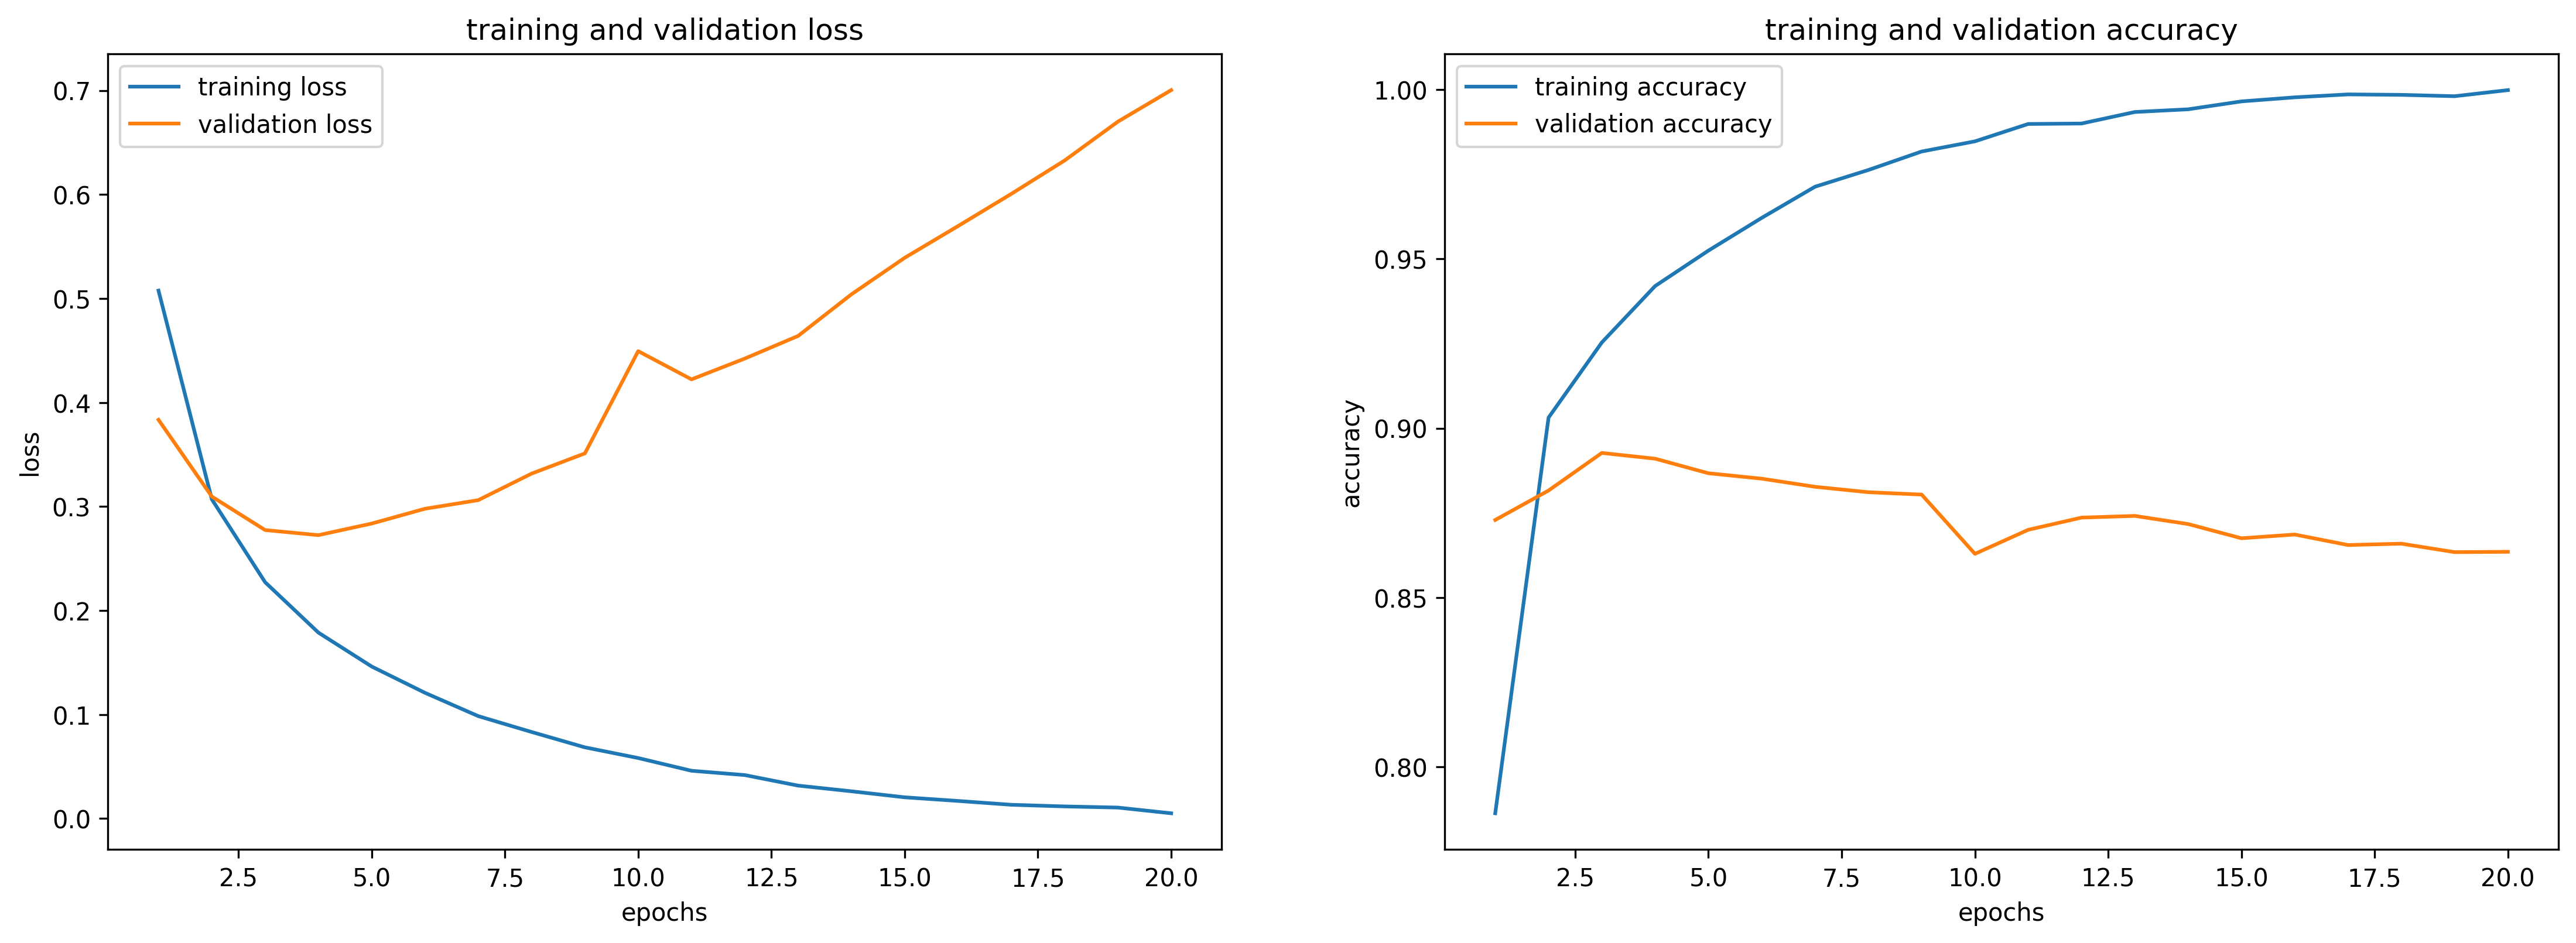

In [19]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = list(range(1, len(history_dict['accuracy']) + 1))

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
sns.lineplot(x=epochs, y=loss_values, label='training loss', ax=axes[0])
sns.lineplot(x=epochs, y=val_loss_values, label='validation loss', ax=axes[0])
axes[0].set_title('training and validation loss')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')

sns.lineplot(x=epochs, y=acc_values, label='training accuracy', ax=axes[1])
sns.lineplot(x=epochs, y=val_acc_values, label='validation accuracy', ax=axes[1])
axes[1].set_title('training and validation accuracy')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
plt.legend()

plt.show()

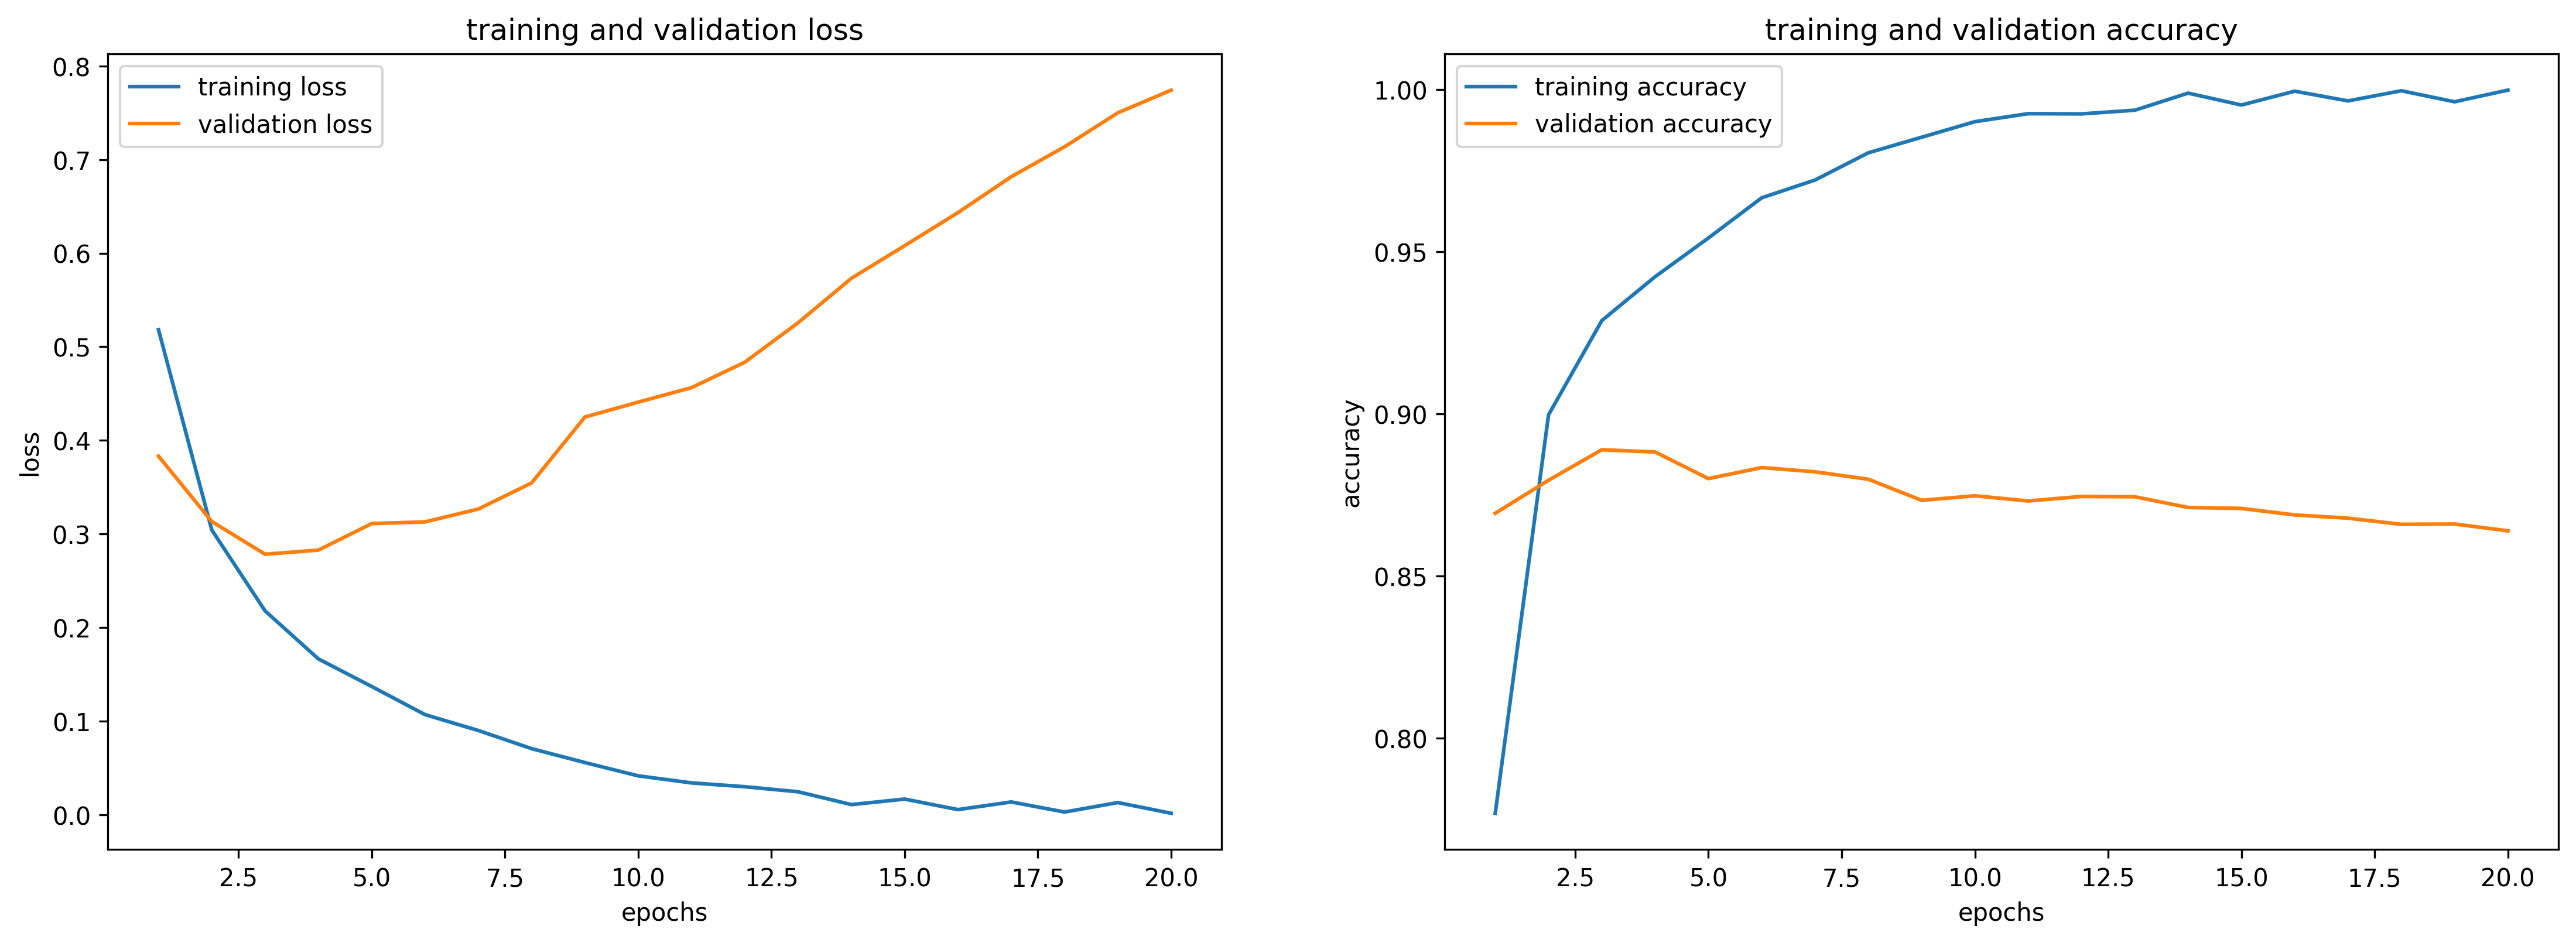

In [34]:
loss_values = history_dict_1['loss']
val_loss_values = history_dict_1['val_loss']
acc_values = history_dict_1['accuracy']
val_acc_values = history_dict_1['val_accuracy']
epochs = list(range(1, len(history_dict_1['accuracy']) + 1))

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
sns.lineplot(x=epochs, y=loss_values, label='training loss', ax=axes[0])
sns.lineplot(x=epochs, y=val_loss_values, label='validation loss', ax=axes[0])
axes[0].set_title('training and validation loss')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')

sns.lineplot(x=epochs, y=acc_values, label='training accuracy', ax=axes[1])
sns.lineplot(x=epochs, y=val_acc_values, label='validation accuracy', ax=axes[1])
axes[1].set_title('training and validation accuracy')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
plt.legend()

plt.show()

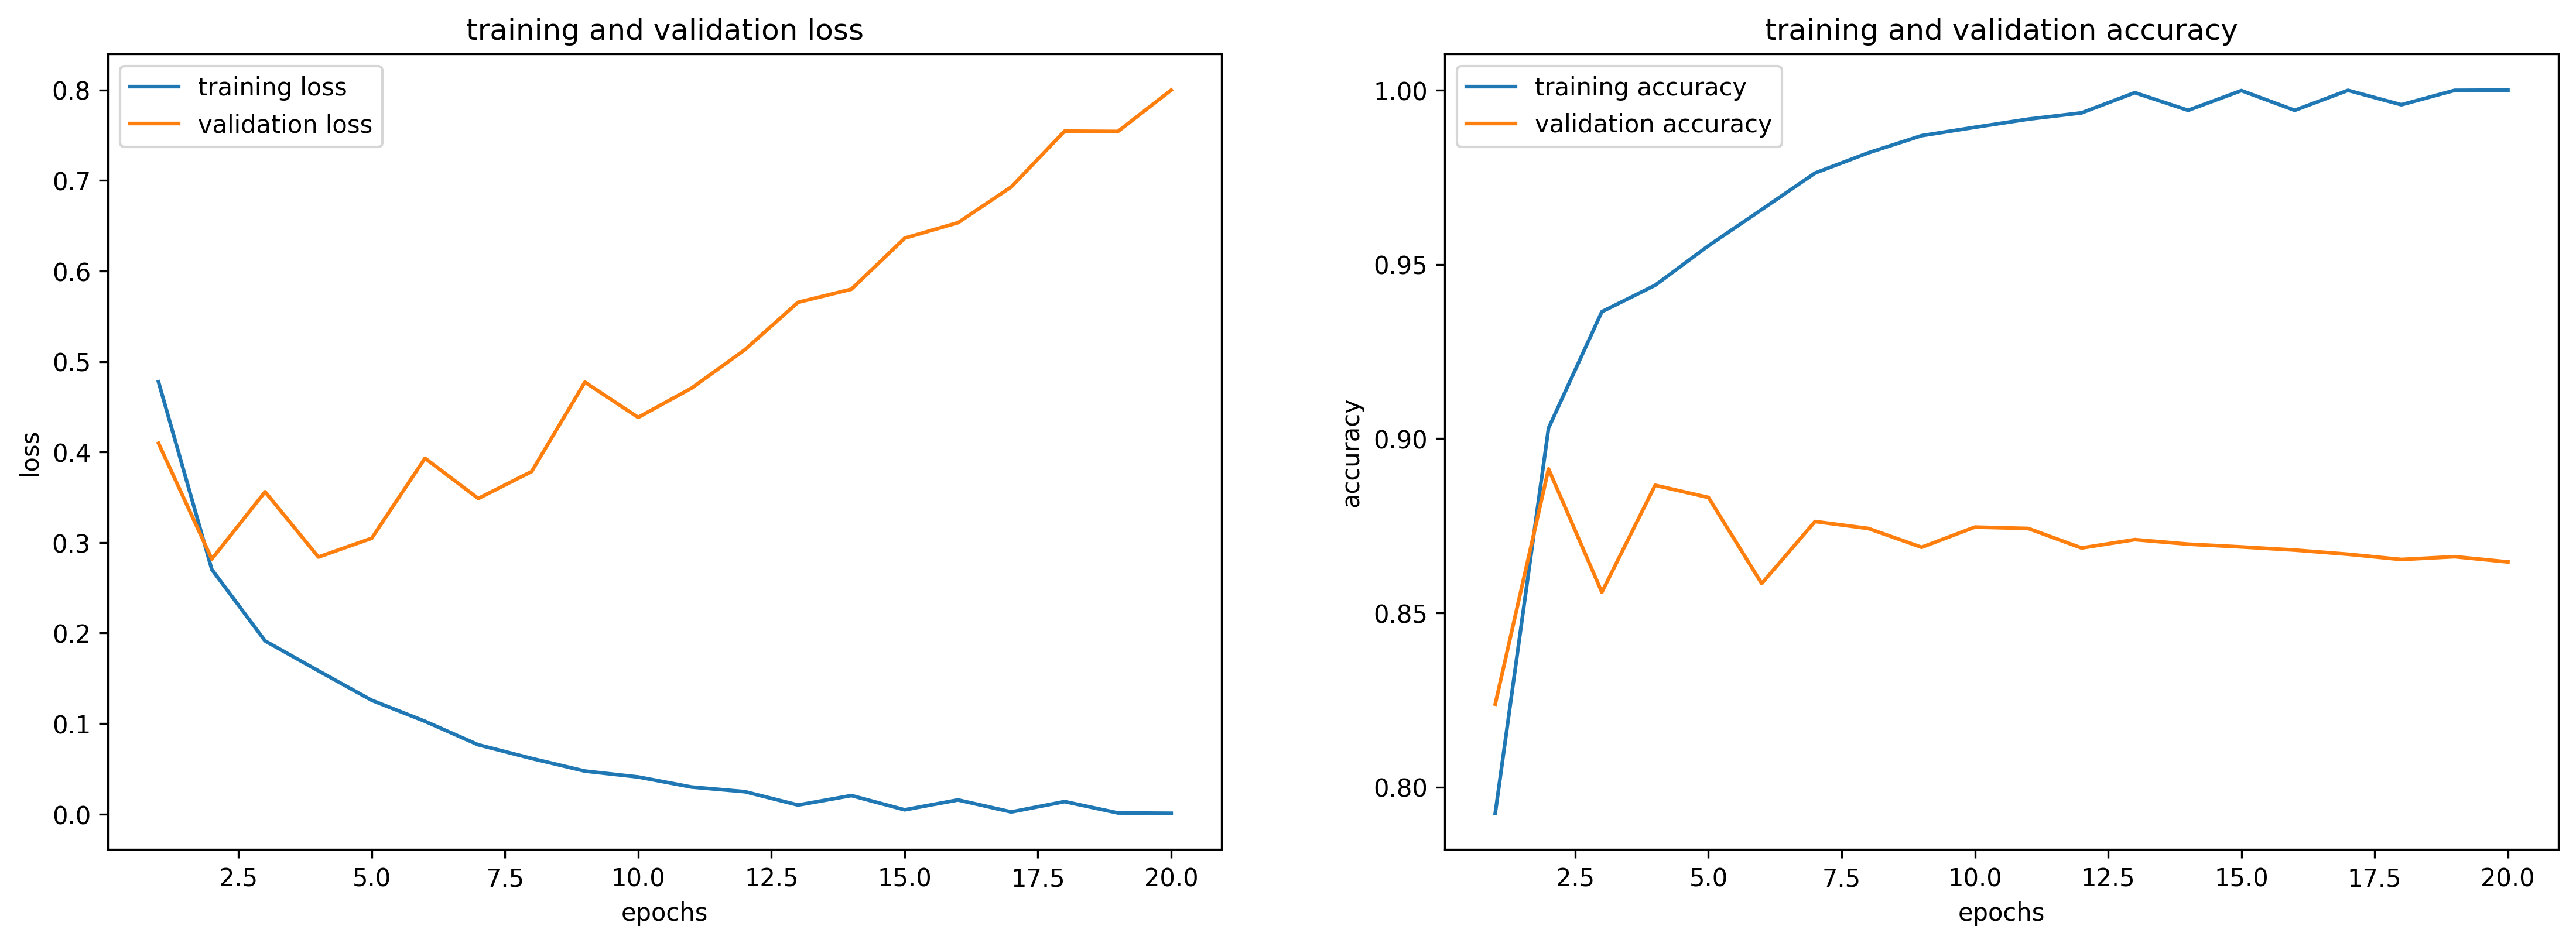

In [15]:
loss_values = history_dict_2['loss']
val_loss_values = history_dict_2['val_loss']
acc_values = history_dict_2['accuracy']
val_acc_values = history_dict_2['val_accuracy']
epochs = list(range(1, len(history_dict_2['accuracy']) + 1))

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
sns.lineplot(x=epochs, y=loss_values, label='training loss', ax=axes[0])
sns.lineplot(x=epochs, y=val_loss_values, label='validation loss', ax=axes[0])
axes[0].set_title('training and validation loss')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')

sns.lineplot(x=epochs, y=acc_values, label='training accuracy', ax=axes[1])
sns.lineplot(x=epochs, y=val_acc_values, label='validation accuracy', ax=axes[1])
axes[1].set_title('training and validation accuracy')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
plt.legend()

plt.show()

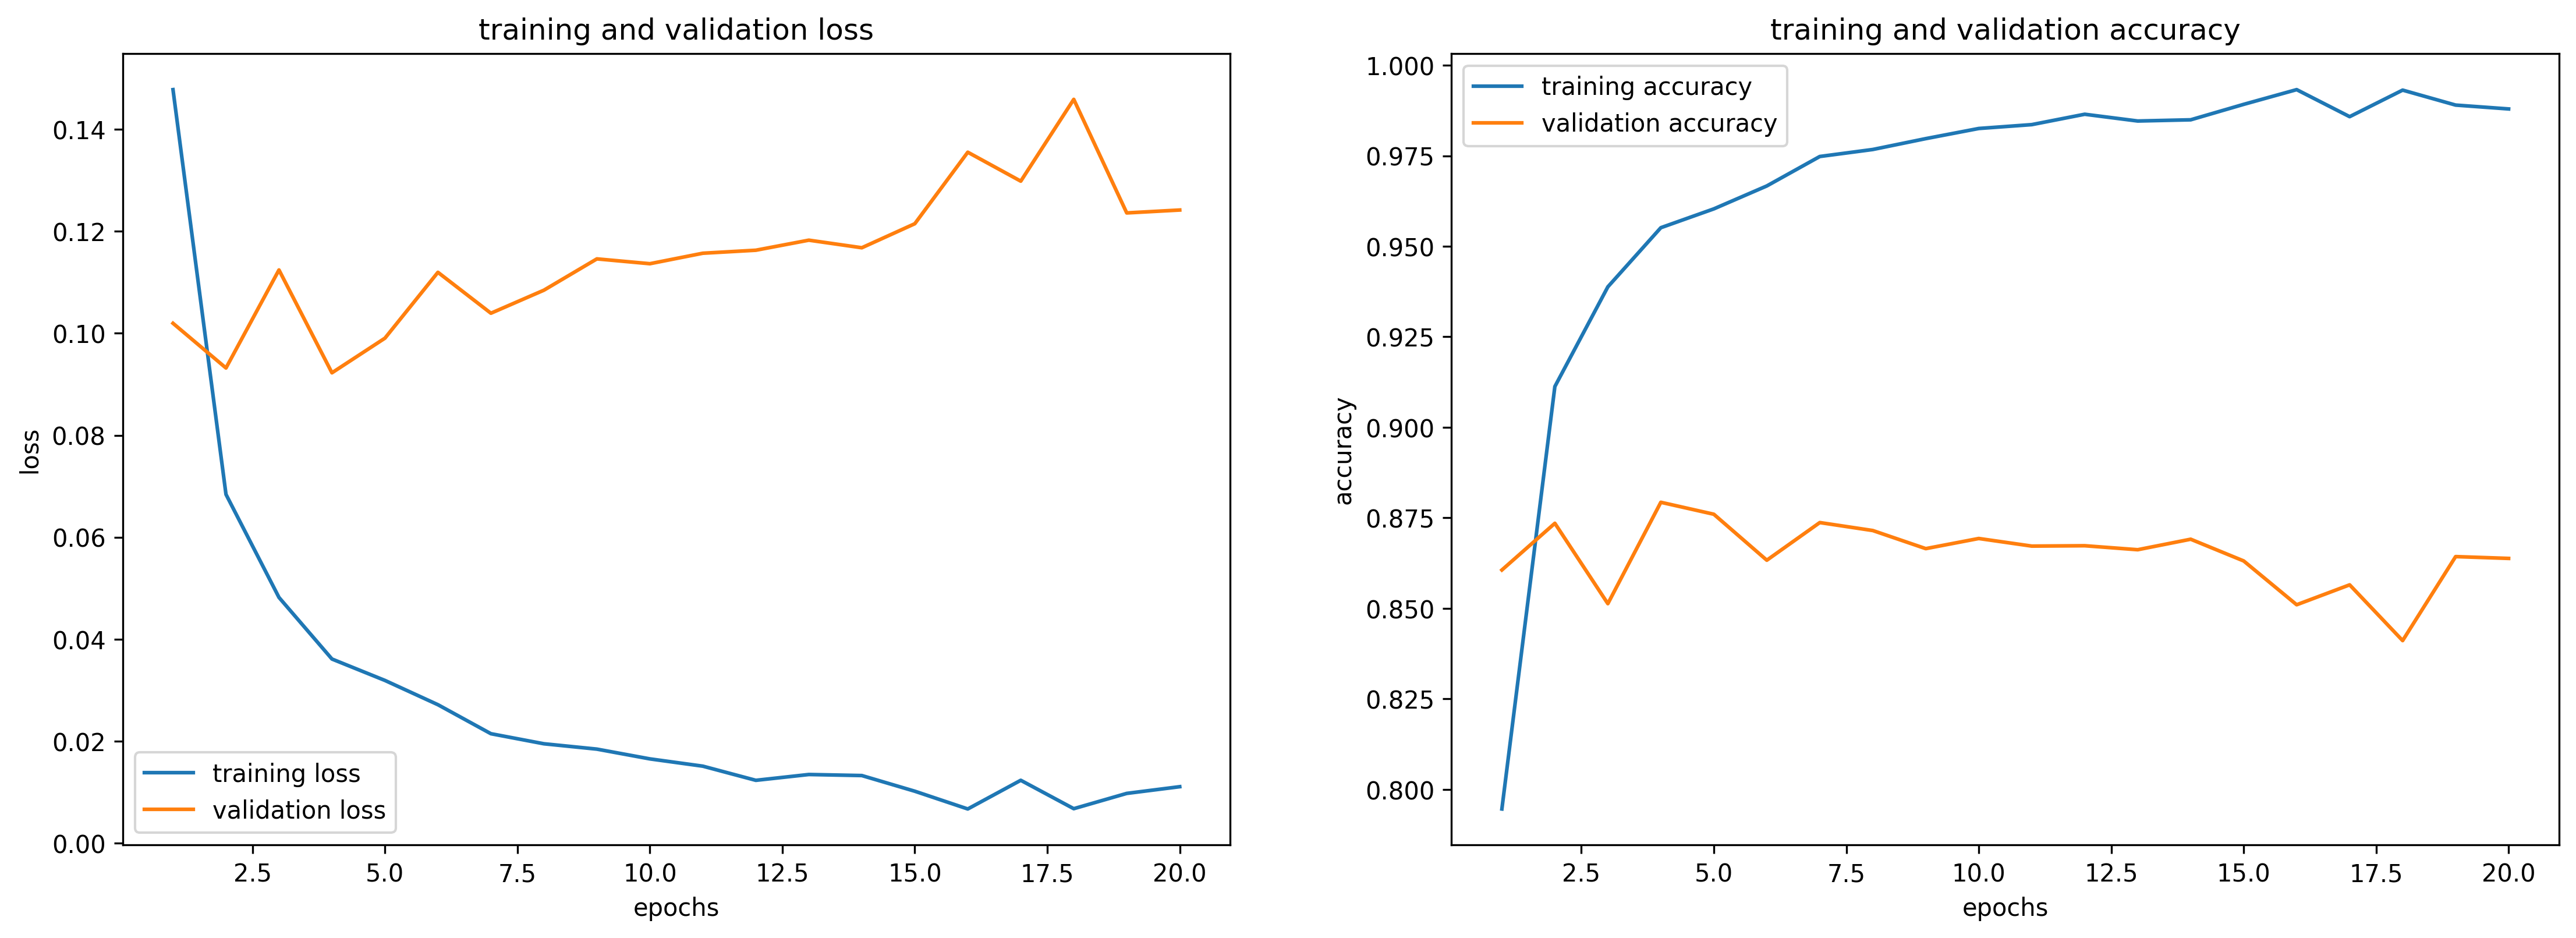

In [19]:
loss_values = history_dict_3['loss']
val_loss_values = history_dict_3['val_loss']
acc_values = history_dict_3['accuracy']
val_acc_values = history_dict_3['val_accuracy']
epochs = list(range(1, len(history_dict_3['accuracy']) + 1))

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
sns.lineplot(x=epochs, y=loss_values, label='training loss', ax=axes[0])
sns.lineplot(x=epochs, y=val_loss_values, label='validation loss', ax=axes[0])
axes[0].set_title('training and validation loss')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')

sns.lineplot(x=epochs, y=acc_values, label='training accuracy', ax=axes[1])
sns.lineplot(x=epochs, y=val_acc_values, label='validation accuracy', ax=axes[1])
axes[1].set_title('training and validation accuracy')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
plt.legend()

plt.show()